In [1]:
from app.data import Data
from app.content_based import ContentBased

data = Data()
content_based = ContentBased()

In [2]:
df_meta_data = data.read_articles_meta_data()
df_meta_data.head()

,category_id,created_at_ts,publisher_id,words_count
0,0,1513144419000,0,168
1,1,1405341936000,0,189
2,1,1408667706000,0,250
3,1,1408468313000,0,230
4,1,1407071171000,0,162


In [3]:
df_embeddings = data.read_embeddings()
df_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,-0.161183,-0.957233,-0.137944,0.050855,0.830055,0.901365,-0.335148,-0.559561,-0.500603,0.165183,...,0.321248,0.313999,0.636412,0.169179,0.540524,-0.813182,0.286870,-0.231686,0.597416,0.409623
1,-0.523216,-0.974058,0.738608,0.155234,0.626294,0.485297,-0.715657,-0.897996,-0.359747,0.398246,...,-0.487843,0.823124,0.412688,-0.338654,0.320787,0.588643,-0.594137,0.182828,0.397090,-0.834364
2,-0.619619,-0.972960,-0.207360,-0.128861,0.044748,-0.387535,-0.730477,-0.066126,-0.754899,-0.242004,...,0.454756,0.473184,0.377866,-0.863887,-0.383365,0.137721,-0.810877,-0.447580,0.805932,-0.285284
3,-0.740843,-0.975749,0.391698,0.641738,-0.268645,0.191745,-0.825593,-0.710591,-0.040099,-0.110514,...,0.271535,0.036040,0.480029,-0.763173,0.022627,0.565165,-0.910286,-0.537838,0.243541,-0.885329
4,-0.279052,-0.972315,0.685374,0.113056,0.238315,0.271913,-0.568816,0.341194,-0.600554,-0.125644,...,0.238286,0.809268,0.427521,-0.615932,-0.503697,0.614450,-0.917760,-0.424061,0.185484,-0.580292


In [4]:
df_embeddings[df_embeddings.isna()].sum(axis=1).value_counts()

0.0    364047
Name: count, dtype: int64

In [5]:
df_meta_data[['category_id', 'publisher_id', 'words_count']].describe()

,category_id,publisher_id,words_count
count,364047.000000,364047.0,364047.000000
mean,283.108239,0.0,190.897727
std,136.723470,0.0,59.502766
min,0.000000,0.0,0.000000
25%,199.000000,0.0,159.000000
50%,301.000000,0.0,186.000000
75%,399.000000,0.0,218.000000
max,460.000000,0.0,6690.000000


<Axes: >

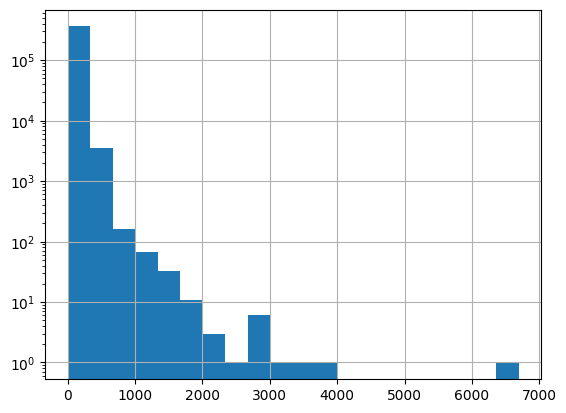

In [6]:
df_meta_data['words_count'].hist(bins=20, log=True)

80.0% atteint à 29
90.0% atteint à 42
95.0% atteint à 57


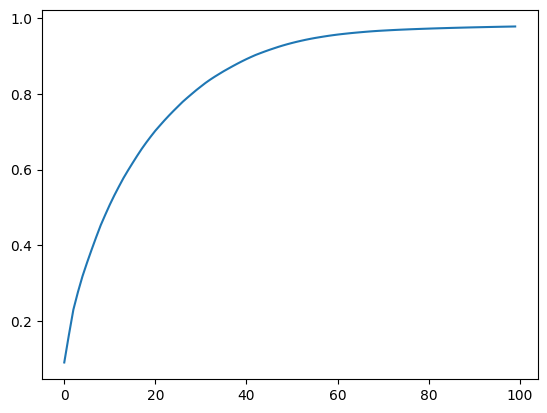

In [7]:
df = content_based.prepare_df(df_meta_data=df_meta_data, df_embeddings=df_embeddings, n_components=100, sample=5000, verbose=True)

In [8]:
df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_91,PCA_92,PCA_93,PCA_94,PCA_95,PCA_96,PCA_97,PCA_98,PCA_99,PCA_100
0,-0.158235,3.482985,-0.720423,1.025597,-0.636845,0.316553,-0.254608,0.383826,-0.404283,-1.557238,...,0.098539,-0.105668,0.058390,-0.074381,0.056189,-0.100544,-0.096060,-0.093808,0.221422,0.030443
1,-0.528022,0.268200,-0.587972,2.651981,1.039051,1.138592,0.182564,2.731255,0.510816,-0.460474,...,-0.036218,0.096026,-0.114445,-0.141587,0.036245,-0.170229,-0.095345,-0.029699,0.005591,-0.135644
2,-2.043546,1.913908,-1.757922,-1.036820,-0.280800,0.244010,0.901276,-2.409218,-2.175343,1.656950,...,-0.145962,-0.269276,0.186713,-0.179169,-0.053149,0.005740,-0.341908,0.263343,-0.004001,0.054207
3,-1.583519,1.474787,4.792411,-0.578590,-1.512287,-1.323605,-1.655056,0.068182,0.520303,-1.011412,...,0.019825,0.002818,-0.119846,-0.189421,-0.168000,0.236197,0.004864,-0.039544,-0.016549,-0.057236
4,-1.362515,-3.040744,-1.219726,-1.652581,-1.705591,-1.572489,-1.723198,-2.253236,-0.069379,2.176621,...,-0.284874,0.070482,-0.142606,0.069575,-0.050546,-0.032877,0.005815,0.005878,0.034194,0.195784


Keeping 43 components

80.0% atteint à 29
90.0% atteint à 42


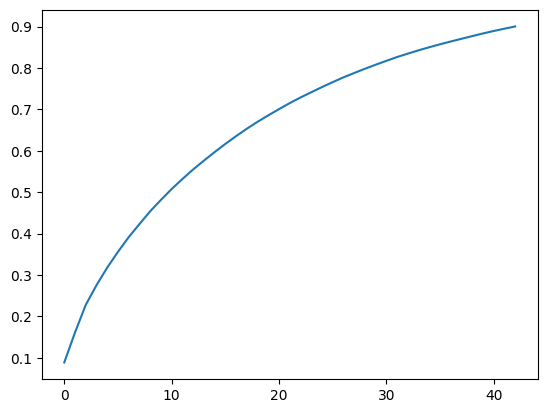

In [9]:
df = content_based.prepare_df(df_meta_data=df_meta_data, df_embeddings=df_embeddings, n_components=43, verbose=True)

In [10]:
df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_34,PCA_35,PCA_36,PCA_37,PCA_38,PCA_39,PCA_40,PCA_41,PCA_42,PCA_43
0,-2.374003,-1.603514,-0.420727,-1.171198,-0.938340,2.481110,-1.182544,0.083122,-0.757272,0.717876,...,-0.175934,0.440954,-0.514032,0.233172,-0.487250,-0.672780,0.242204,-0.249759,0.110875,-0.122623
1,-1.314690,2.229293,2.983813,0.092058,1.168648,0.386136,1.653815,1.092940,-0.227444,-0.901621,...,-0.007807,0.231871,0.359715,1.236467,-0.536591,-0.490189,0.147644,-0.715646,-0.334771,-0.519798
2,-0.769579,-0.660239,2.950206,1.712568,1.875194,-0.282696,0.110489,-1.020843,0.004030,-1.307263,...,0.125739,-0.037801,-0.212026,0.614976,-0.135790,-0.706317,-0.060965,0.343114,-0.334988,0.834256
3,1.543366,2.156110,3.824233,0.360888,-0.769122,-1.107350,0.976309,0.591286,-0.536197,-1.509605,...,0.349151,-0.776150,-0.773154,1.309748,0.278667,0.023479,1.075301,0.483964,-0.263221,0.731192
4,0.425075,0.691406,1.898521,1.890845,0.519366,1.116342,0.126006,0.087065,0.269656,-1.294598,...,0.876185,-0.062685,-0.129623,1.762911,-0.470164,-1.265850,0.837308,-0.231925,0.056338,0.355708


In [11]:
#result = content_based.train(df=df,chunck_size=1000,verbose=True)

In [3]:
r = content_based.recommand(user_id=45833)
r

(364047, 5, 2)
Current user articles: 16129, 42770, 58235, 68248, 87181, 157478, 158082, 158192, 202355, 233464, 236400, 257291, 271770, 272143, 277681, 277712, 283026, 283239, 284170, 284514, 284547, 285095, 285101, 285331, 285333, 285335, 285342, 285422, 285435, 285446, 285648, 285664, 285754, 285904, 286060, 286161, 286336, 289003, 293301, 308156, 336221, 336223, 336250, 351364, 352121
Recommended user articles: 205672, 208554, 74430, 72376, 348660


[205672, 208554, 74430, 72376, 348660]

In [8]:
import json
rr = [str(x) for x in r]
print(rr)
json.dumps({'toto': rr})

['205672', '208554', '74430', '72376', '348660']


'{"toto": ["205672", "208554", "74430", "72376", "348660"]}'